In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
import os.path as osp
import pandas as pd
from itertools import product

In [129]:
FOLDER_DATA = '/data/shared/bvFTD/Machine_Learning/data'
X = np.load(osp.join(FOLDER_DATA, 'data_set.npy'))
group_labels = pd.read_csv(osp.join(FOLDER_DATA, 'class_labels.csv'))
id_ftd = group_labels.ftd.as_matrix()
id_neurol = group_labels.neurol.as_matrix()
id_psych = group_labels.psych.as_matrix()

In [130]:
# masks zeros out
id_zeros = np.all(X == 0, axis=0)
X = X[:, ~id_zeros]

In [131]:
def make_scatter(data):
    colors = ['r', 'g', 'b']
    plt.scatter(data[id_ftd, 0], data[id_ftd, 1], c=colors[0], s=30)
    plt.scatter(data[id_neurol, 0], data[id_neurol, 1], c=colors[1], s=30)
    plt.scatter(data[id_psych, 0], data[id_psych, 1], c=colors[2], s=30)
    plt.legend(['FTD', 'Neurological', 'Psychiatry'])

In [145]:
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X)

In [146]:
scaler = StandardScaler()
X_pca_scl = scaler.fit_transform(X_pca)

In [148]:
tsne = TSNE(n_components=3, learning_rate=200, perplexity=10, init='pca', verbose=1, method='exact')
tsne.fit(X_pca_scl)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 67 / 67
[t-SNE] Mean sigma: 1.147088
[t-SNE] KL divergence after 100 iterations with early exaggeration: 13.206828
[t-SNE] Error after 725 iterations: 13.206828


TSNE(angle=0.5, early_exaggeration=4.0, init='pca', learning_rate=200,
   method='exact', metric='euclidean', min_grad_norm=1e-07, n_components=3,
   n_iter=1000, n_iter_without_progress=30, perplexity=10,
   random_state=None, verbose=1)

In [139]:
learn_rate = np.linspace(100, 1000, 50)
perplexity = np.arange(1, 51)

In [ ]:
learn_rate = np.linspace(100, 1000, 200)
perplexity = np.arange(1, 51)
n_components = np.arange(2,4)
n_jobs = 10

embedings = {}
for n in n_components:
    embedings[n] = np.zeros((X_pca_scl.shape[0], n, learn_rate.size * perplexity.size))
    
kl_div = np.zeros(learn_rate.size * perplexity.size * n_components, dtype=np.float)

In [3]:
def inner_loop_iteration(data, n, rate, perp, i):
    print '#Iteration {}'.format(i)
    print '#Learning rate ({}) #Perplexity: ({}) #Components: ({})'.format(rate, perp, n)
    tsne = TSNE(n_components=n, learning_rate=rate, perplexity=perp, init='pca', method='exact')
    tsne.fit(X_pca_scl)
    kl_div[i] = tsne.kl_divergence_
    embedings[n][..., i] = tsne.embedding_
    return tsne.kl_divergence, tsne.embedding_

Parallel(n_jobs=n_jobs, verbose=1)(delayed(inner_loop_iteration)(n, rate, perp, i)
                                   for i, (rate, perp, n) in enumerate(product(learn_rate, perplexity, n_components)))

print kl_div.min(), kl_div.argmin()

NameError: name 'np' is not defined

In [116]:
id_wrong = np.isclose(kl_div, np.zeros_like(kl_div))

In [117]:
kl_div_tmp = kl_div[~id_wrong]

In [119]:
embedings = embedings[..., ~id_wrong]

In [125]:
kl_div_tmp.min()

9.7953811641619009

In [123]:
kl_div_tmp.argmin()

899

In [102]:
best_lambda = learn_rate[np.argmin(kl_div)]
print best_lambda111

338.775510204


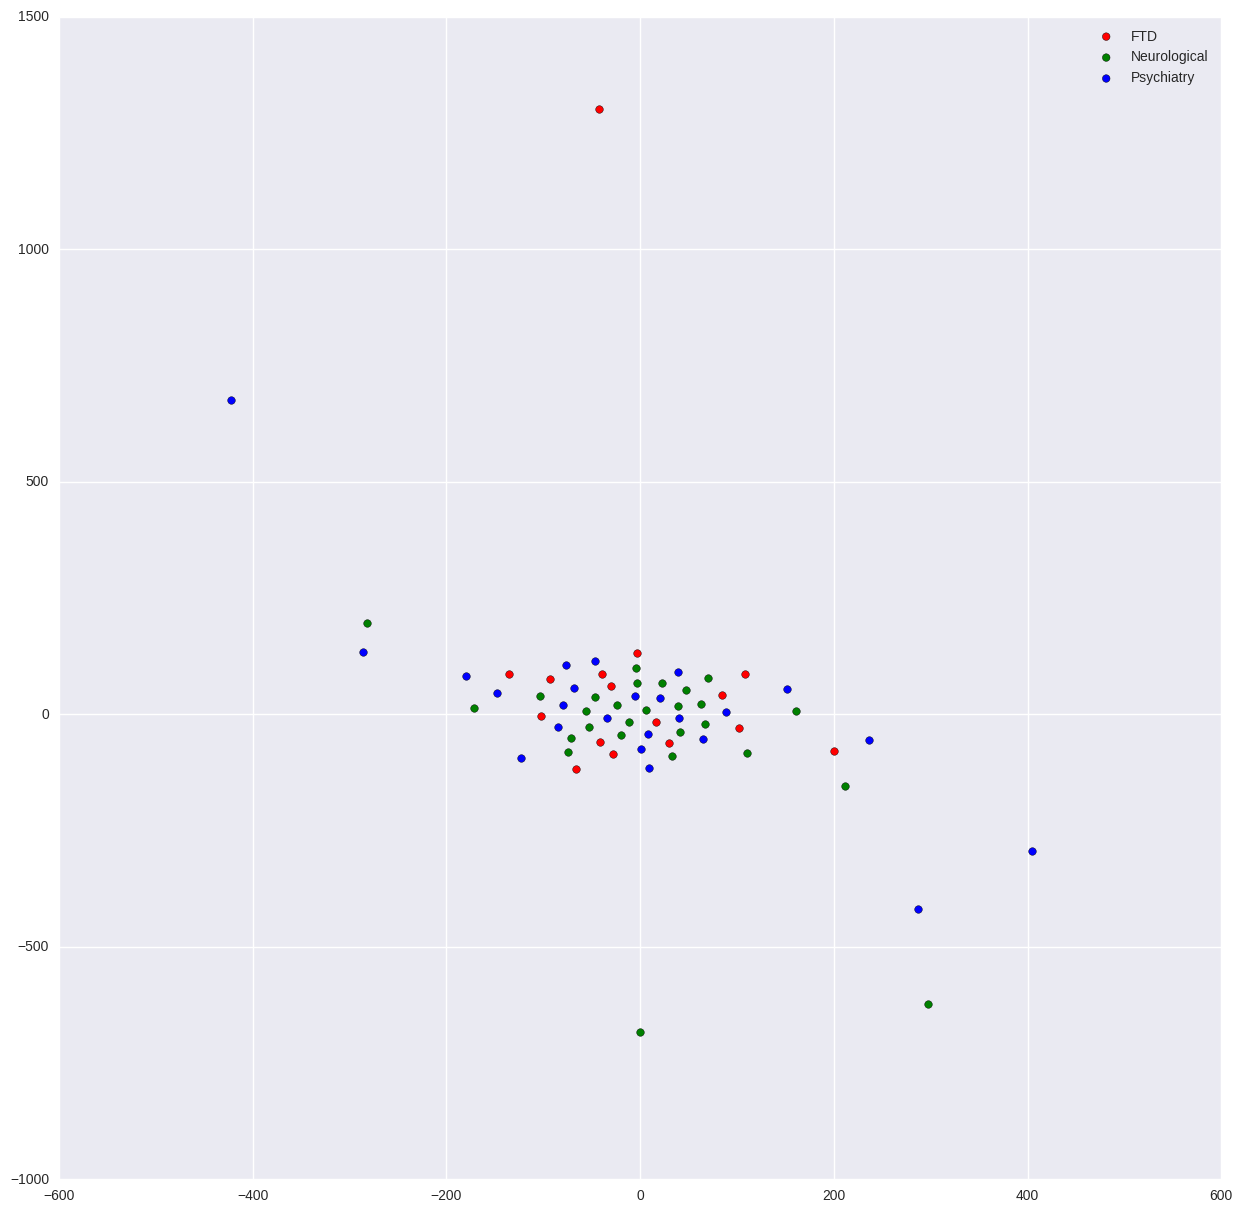

In [126]:
plt.figure(figsize=(15, 15))
make_scatter(embedings[..., 899])

In [ ]:
perplexity = np.arange(5, 51)
kl_div = np.zeros_like(perplexity)
for i, perp in enumerate(perplexity):
    tsne = TSNE(n_components=2, perplexity=perp, init='pca', verbose=0, method='exact')
    tsne.fit(X_pca_scl)
    kl_div[i] = tsne.kl_divergence_

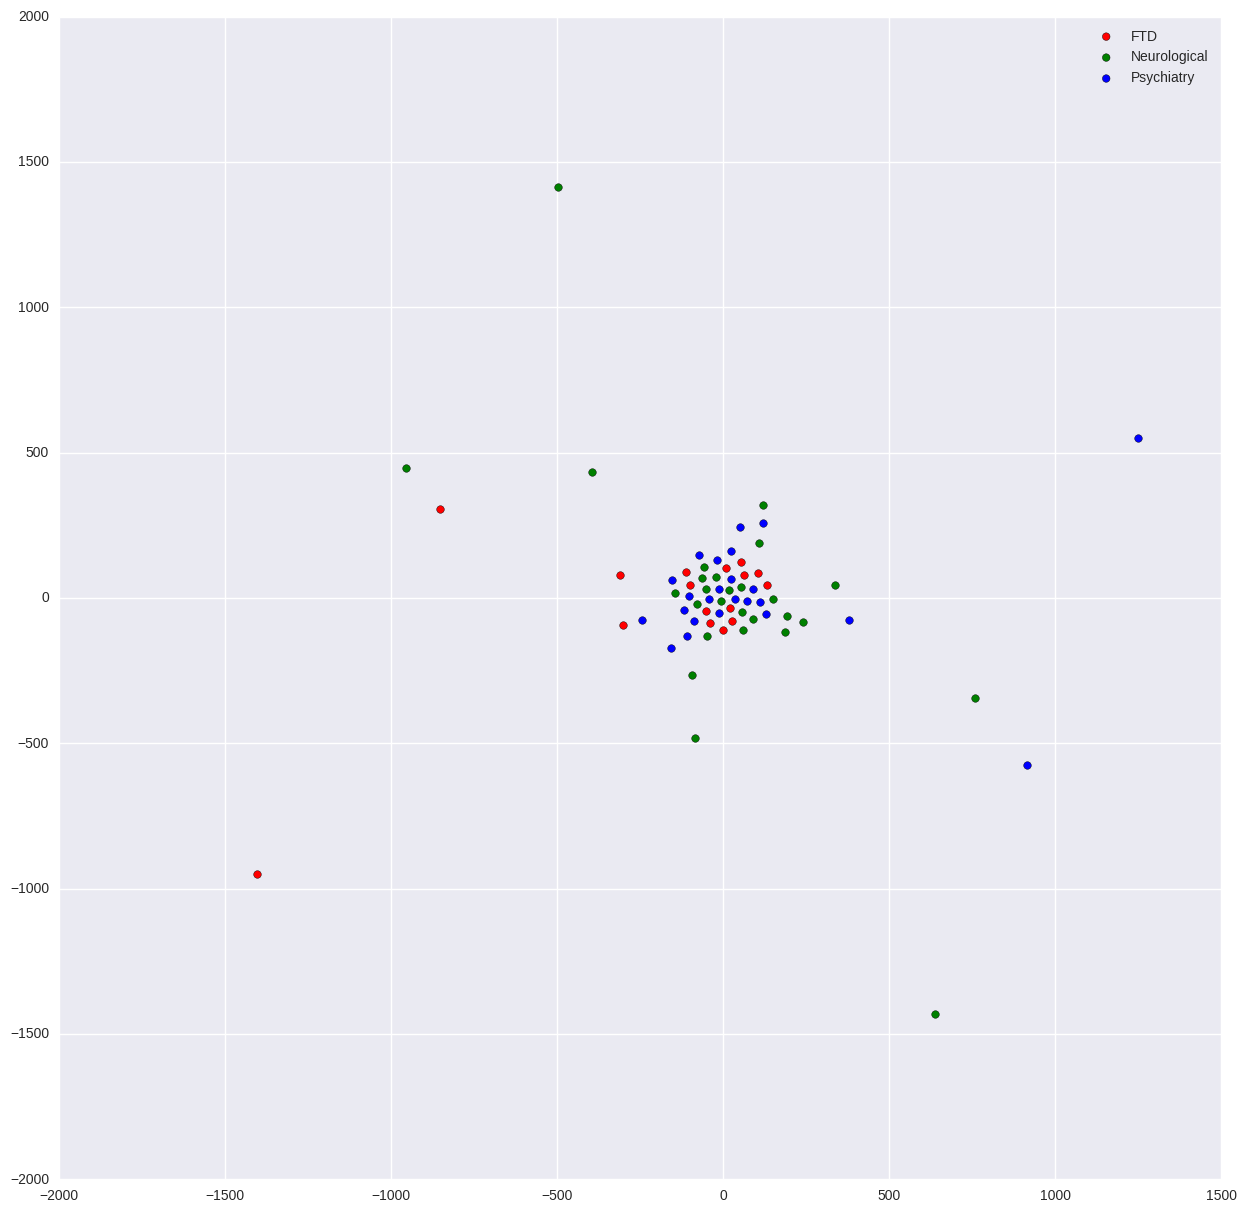

In [86]:
plt.figure(figsize=(15, 15))
make_scatter(tsne.embedding_)

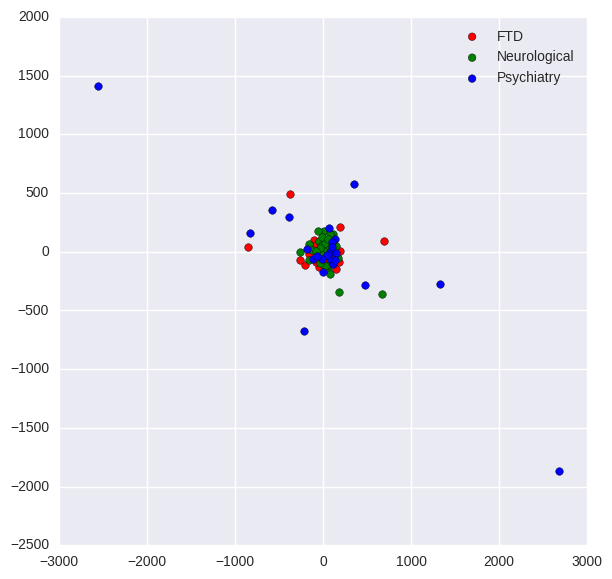

In [73]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
make_scatter(tsne.embedding_)